## Main Question
Will the loan application be approved?

### Data Understanding

Loan approval prediction means using credit history data of the loan applicants and algorithms to build an intelligent system that can determine loan approvals.

**What is the domain area of the dataset?**  
The dataset loan.csv contains information collected from different insurance companies!
 
**Which data format?**  
The dataset is in csv format!

**Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!

**Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  

**Example**:   
Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status  
LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y  

**How many features and how many observations does the dataset have?**  
The dataset has:  

1. 13 features or columns!
2. 615 observations or rows!

**Does it contain numerical features? How many?**  
Yes it contains 4 different numerical features.

**Does it contain categorical features? How many?**
Yes it contains 6 categorical features!

### Exploratory Data Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv("Datasets/loan.csv")

In [4]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
dataset.shape

(614, 13)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
# Checking Missing Values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### Dealing with missing values in CATEGORICAL VARIABLES
1. We fill in missing values with the MODE of each column.
2. The mode represents the value that appears most often in the column.

In [10]:
dataset.fillna({'Gender': dataset['Gender'].mode()[0]}, inplace=True)
dataset.fillna({'Married': dataset['Married'].mode()[0]}, inplace=True)
dataset.fillna({'Dependents': dataset['Dependents'].mode()[0]}, inplace=True)
dataset.fillna({'Self_Employed': dataset['Self_Employed'].mode()[0]}, inplace=True)

#### Dealing with missing values in NUMERICAL VARIABLES
1. We can fill in the missing values of the **LoanAmount column** with the median value.  
The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;

2. We can fill in the missing values of the **Loan_Amount_Term column** with the mode value of the column.    
Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;

3. We can fill in the missing values of the **Credit_History column** with the mode value.  
Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [11]:
# 1.
dataset.fillna({'LoanAmount': dataset['LoanAmount'].median()}, inplace=True)

# 2.
dataset.fillna({'Loan_Amount_Term': dataset['Loan_Amount_Term'].mode()[0]}, inplace=True)

# 3.
dataset.fillna({'Credit_History': dataset['Credit_History'].mode()[0]}, inplace=True)

In [12]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Distribution of the Loan_Status.  
How many Loans have approved or denied.

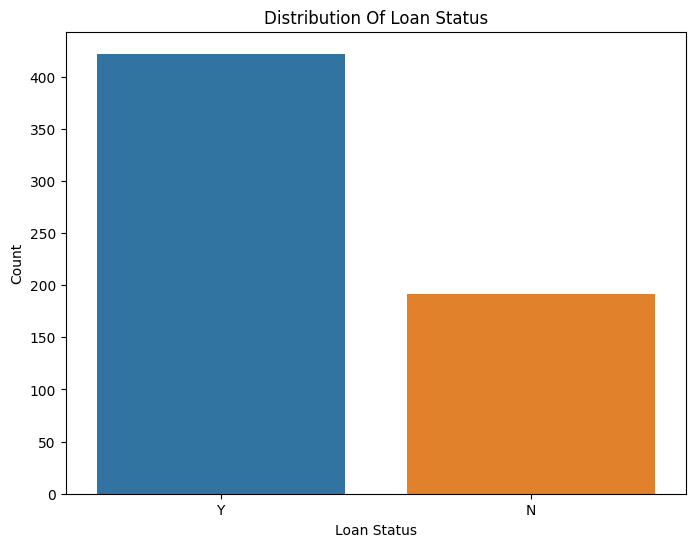

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Loan_Status", data=dataset, hue=dataset['Loan_Status'])
plt.title("Distribution Of Loan Status")
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Distribution of Loan Status')

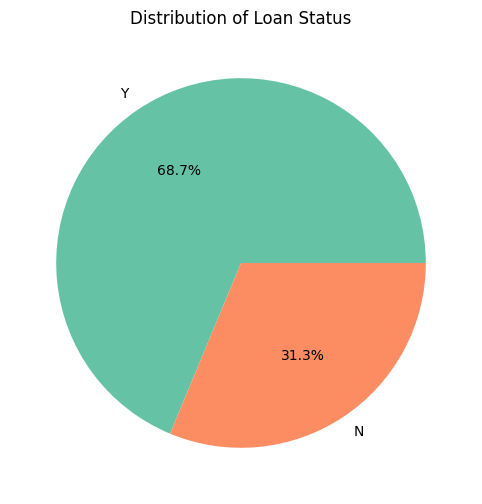

In [17]:
# Calculate the percentages
loan_status_counts = dataset['Loan_Status'].value_counts(normalize=True) * 100

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', colors=['#66c2a5','#fc8d62'])
plt.title('Distribution of Loan Status')

Distribution of the Gender feature.

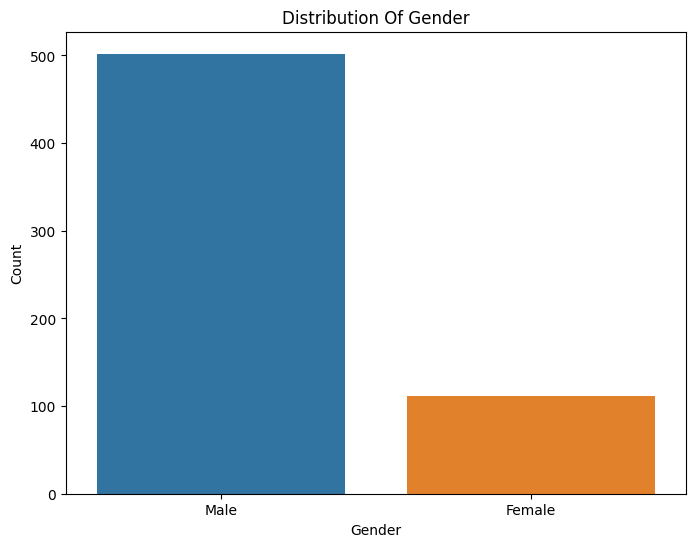

In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Gender", data=dataset, hue=dataset['Gender'])
plt.title("Distribution Of Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Distribution of Marital Status Column!

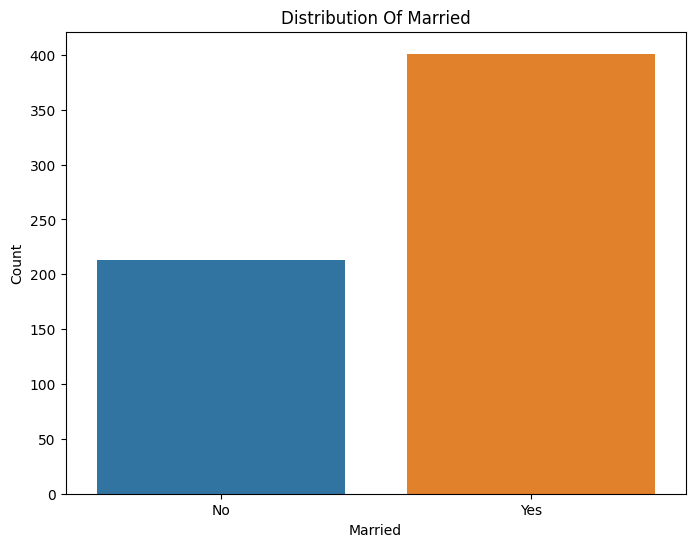

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Married", data=dataset, hue=dataset['Married'])
plt.title("Distribution Of Married")
plt.xlabel('Married')
plt.ylabel('Count')
plt.show()